# **Objective:**
### Stock price prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.

In [ ]:
# Libraries to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries required for this analysis
import math
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# To convert order date in month-year format
import datetime as dt
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 4000000)
pd.set_option('display.max_columns', 4000000)
pd.set_option('float_format','{:f}'.format)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# library for sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **1. Reading and Understanding data**

In [ ]:
# Reading the csv file and putting it into 'df_sp_bse_stock' object.

df_sp_bse_stock = pd.read_csv('drive/MyDrive/^BSESN_hist.csv')

In [ ]:
# Checking the data in the dataframe
df_sp_bse_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-11-12,16822.179688,16896.619141,16605.009766,16696.029297,16696.029297,27200.000000
1,2009-11-13,16693.150391,16909.740234,16666.699219,16848.830078,16848.830078,21400.000000
2,2009-11-16,16893.109375,17083.199219,16893.109375,17032.509766,17032.509766,19000.000000
3,2009-11-17,17036.230469,17080.169922,16882.980469,17050.650391,17050.650391,20400.000000
4,2009-11-18,17032.009766,17098.789063,16958.410156,16998.779297,16998.779297,18200.000000
5,2009-11-19,17004.980469,17004.980469,16712.330078,16785.650391,16785.650391,18200.000000
6,2009-11-20,16772.750000,17041.789063,16635.750000,17021.849609,17021.849609,22400.000000
7,2009-11-23,17067.140625,17214.580078,17045.019531,17180.179688,17180.179688,22000.000000
8,2009-11-24,17230.859375,17230.859375,17027.519531,17131.080078,17131.080078,18200.000000
9,2009-11-25,17149.080078,17290.480469,17124.150391,17198.949219,17198.949219,17000.000000


In [ ]:
# Check missing values
df_sp_bse_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       300 non-null    object 
 1   Open       294 non-null    float64
 2   High       294 non-null    float64
 3   Low        294 non-null    float64
 4   Close      294 non-null    float64
 5   Adj Close  294 non-null    float64
 6   Volume     294 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.5+ KB


In [ ]:
df_sp_bse_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-11-12,16822.179688,16896.619141,16605.009766,16696.029297,16696.029297,27200.000000
1,2009-11-13,16693.150391,16909.740234,16666.699219,16848.830078,16848.830078,21400.000000
2,2009-11-16,16893.109375,17083.199219,16893.109375,17032.509766,17032.509766,19000.000000
3,2009-11-17,17036.230469,17080.169922,16882.980469,17050.650391,17050.650391,20400.000000
4,2009-11-18,17032.009766,17098.789063,16958.410156,16998.779297,16998.779297,18200.000000


In [ ]:
# Check the missing values
df_sp_bse_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       300 non-null    object 
 1   Open       294 non-null    float64
 2   High       294 non-null    float64
 3   Low        294 non-null    float64
 4   Close      294 non-null    float64
 5   Adj Close  294 non-null    float64
 6   Volume     294 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.5+ KB


In [ ]:
df_sp_bse_stock_copy1 = df_sp_bse_stock.copy()

In [ ]:
tdi = pd.DatetimeIndex(df_sp_bse_stock_copy1['Date'])

In [ ]:
df_sp_bse_stock_copy1.set_index(tdi, inplace=True)

In [ ]:
df_sp_bse_stock_copy1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2009-11-12,2009-11-12,16822.179688,16896.619141,16605.009766,16696.029297,16696.029297,27200.000000
2009-11-13,2009-11-13,16693.150391,16909.740234,16666.699219,16848.830078,16848.830078,21400.000000
2009-11-16,2009-11-16,16893.109375,17083.199219,16893.109375,17032.509766,17032.509766,19000.000000
2009-11-17,2009-11-17,17036.230469,17080.169922,16882.980469,17050.650391,17050.650391,20400.000000
2009-11-18,2009-11-18,17032.009766,17098.789063,16958.410156,16998.779297,16998.779297,18200.000000


Text(0, 0.5, 'Close')

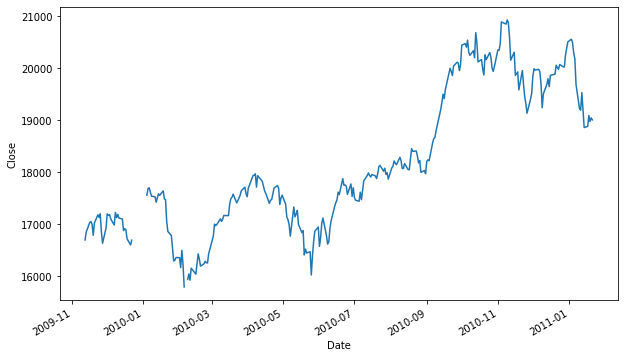

In [ ]:
# Check the missing values in the graph
plt.figure(figsize=(10, 6))
df_sp_bse_stock_copy1['Close'].plot()
plt.ylabel('Close')

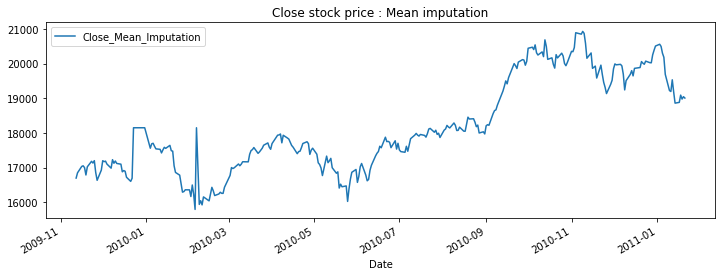

In [ ]:
# Impute missing values in the graph
df_sp_bse_stock_copy1 = df_sp_bse_stock_copy1.assign(Close_Mean_Imputation=df_sp_bse_stock_copy1.Close.fillna(df_sp_bse_stock_copy1.Close.mean()))
df_sp_bse_stock_copy1[['Close_Mean_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Close stock price : Mean imputation')
plt.show(block=False)

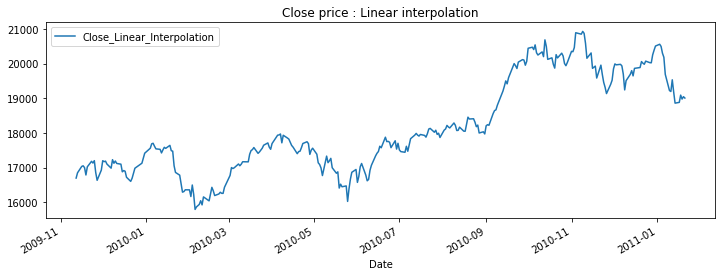

In [ ]:
# Interpolate it
df_sp_bse_stock_copy1 = df_sp_bse_stock_copy1.assign(Close_Linear_Interpolation=df_sp_bse_stock_copy1.Close.interpolate(method='linear'))
df_sp_bse_stock_copy1[['Close_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Close price : Linear interpolation')
plt.show(block=False)

In [ ]:
df_sp_bse_stock_copy1['Close'] = df_sp_bse_stock_copy1['Close_Linear_Interpolation']
df_sp_bse_stock_copy1.drop(columns=['Close_Mean_Imputation','Close_Linear_Interpolation'],inplace=True)

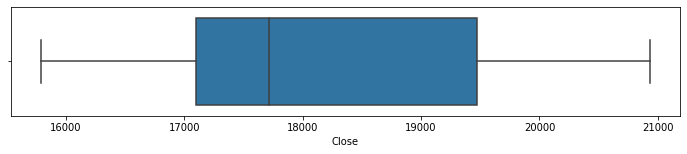

In [ ]:

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=df_sp_bse_stock_copy1['Close'],whis=1.5)

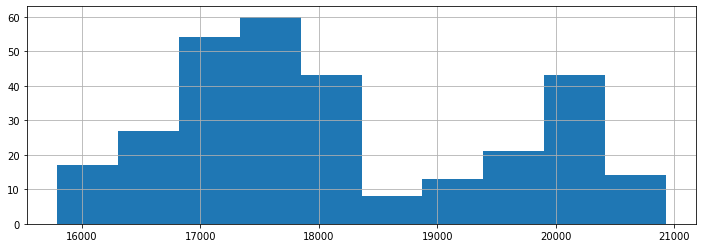

In [ ]:
fig = df_sp_bse_stock_copy1.Close.hist(figsize = (12,4))

In [ ]:
df_sp_bse_stock_copy1.sort_index(inplace= True)

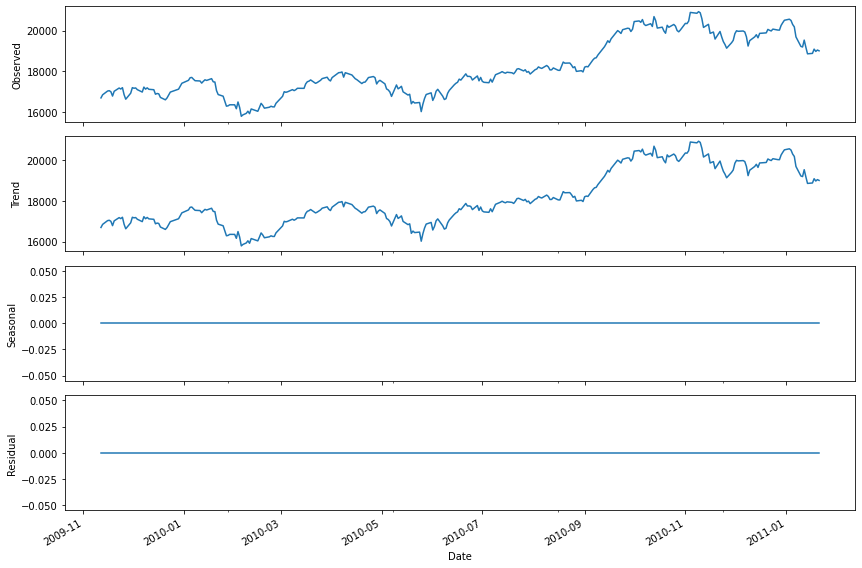

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(x=df_sp_bse_stock_copy1.Close, model='additive',freq=1) # additive seasonal index
fig = decomposition.plot()
plt.show()

#### Therefore the data shows trend but no seasonality and noise.

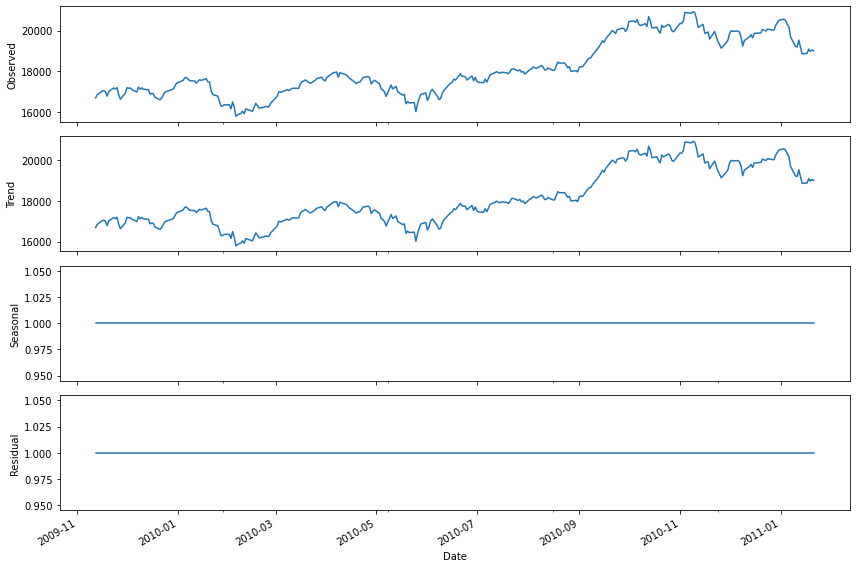

In [ ]:
# Multiplicative seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df_sp_bse_stock_copy1.Close, model='multiplicative',freq=1) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

### Deciding which time series model to choose:
- The dataset has more than 10 historical data
- It shows a trend but has no seasonality
- So we will use **Simple Exponential Smoothing**

# **Simple exponential smoothing**

In [ ]:
# Splitting data into train and test sets
train_len = 249
train = df_sp_bse_stock_copy1[0:train_len] # first 249 months as training set
test = df_sp_bse_stock_copy1[train_len:] # last 51 months as out-of-time test set

In [ ]:
test.count()

Date         51
Open         51
High         51
Low          51
Close        51
Adj Close    51
Volume       51
dtype: int64

In [ ]:
train['Close'].dtype

dtype('float64')

In [ ]:
train['Close']

Date
2009-11-12   16696.029297
2009-11-13   16848.830078
2009-11-16   17032.509766
2009-11-17   17050.650391
2009-11-18   16998.779297
2009-11-19   16785.650391
2009-11-20   17021.849609
2009-11-23   17180.179688
2009-11-24   17131.080078
2009-11-25   17198.949219
2009-11-26   16854.929688
2009-11-27   16632.009766
2009-11-30   16926.220703
2009-12-01   17198.269531
2009-12-02   17169.910156
2009-12-03   17185.679688
2009-12-04   17101.539063
2009-12-07   16983.140625
2009-12-08   17227.679688
2009-12-09   17125.220703
2009-12-10   17189.310547
2009-12-11   17119.029297
2009-12-14   17097.550781
2009-12-15   16877.160156
2009-12-16   16912.769531
2009-12-17   16894.250000
2009-12-18   16719.830078
2009-12-21   16601.199219
2009-12-22   16692.000000
2009-12-23   16836.455078
2009-12-24   16980.910156
2009-12-29   17125.365235
2009-12-30   17269.820313
2009-12-31   17414.275391
2010-01-04   17558.730469
2010-01-05   17686.240234
2010-01-06   17701.130859
2010-01-07   17615.720703
2010-01

In [ ]:
train['Close'].dtype

dtype('float64')

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(np.asarray(train['Close']))
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['stock_forecast'] = model_fit.forecast(51)

In [ ]:
y_hat_ses.count()

Date              51
Open              51
High              51
Low               51
Close             51
Adj Close         51
Volume            51
stock_forecast    51
dtype: int64

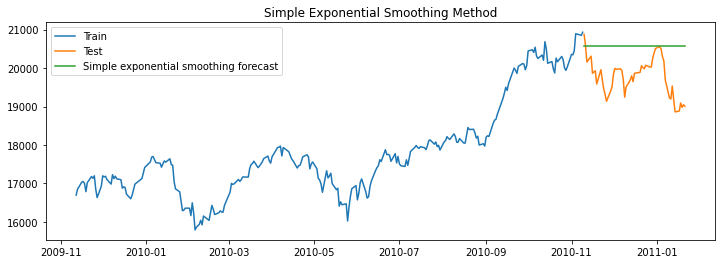

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_ses['stock_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_ses['stock_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_ses['stock_forecast'])/test['Close'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,926.410000,4.120000


### Since the MAPE of this model is 4.12% the accuracy of this model is 95.88% which is good.

# **Text Analysis**

In [ ]:

news_df = pd.read_csv('drive/MyDrive/india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
news_df.shape

(3424067, 3)

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [ ]:
news_df.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [ ]:

news_df['headline_text'].head()

0    Status quo will not be disturbed at Ayodhya; s...
1                  Fissures in Hurriyat over Pak visit
2                America's unwanted heading for India?
3                   For bigwigs; it is destination Goa
4                 Extra buses to clear tourist traffic
Name: headline_text, dtype: object

In [ ]:

news_df.drop('headline_category', axis=1, inplace=True)
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [ ]:
news_df.rename(columns={'publish_date': 'Date'}, inplace = True)

news_df = news_df.drop_duplicates()
news_df.reset_index(inplace=True, drop=True)
news_df.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [ ]:
news_df['headline_text'] = news_df.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news_df = news_df.drop_duplicates() 
news_df.reset_index(inplace = True, drop = True)
news_df.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


In [ ]:
df_sp_bse_stock_copy1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2009-11-12,2009-11-12,16822.179688,16896.619141,16605.009766,16696.029297,16696.029297,27200.000000
2009-11-13,2009-11-13,16693.150391,16909.740234,16666.699219,16848.830078,16848.830078,21400.000000
2009-11-16,2009-11-16,16893.109375,17083.199219,16893.109375,17032.509766,17032.509766,19000.000000
2009-11-17,2009-11-17,17036.230469,17080.169922,16882.980469,17050.650391,17050.650391,20400.000000
2009-11-18,2009-11-18,17032.009766,17098.789063,16958.410156,16998.779297,16998.779297,18200.000000


In [ ]:
df_sp_bse_stock_copy1.reset_index(drop=True, inplace=True)

In [ ]:
df_sp_bse_stock_copy1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-11-12,16822.179688,16896.619141,16605.009766,16696.029297,16696.029297,27200.000000
1,2009-11-13,16693.150391,16909.740234,16666.699219,16848.830078,16848.830078,21400.000000
2,2009-11-16,16893.109375,17083.199219,16893.109375,17032.509766,17032.509766,19000.000000
3,2009-11-17,17036.230469,17080.169922,16882.980469,17050.650391,17050.650391,20400.000000
4,2009-11-18,17032.009766,17098.789063,16958.410156,16998.779297,16998.779297,18200.000000


In [ ]:
news_df.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


In [ ]:
start_date = '2009-11-12'
end_date = '2010-11-09'

In [ ]:
mask = (news_df['Date'] >= start_date) & (news_df['Date'] <= end_date)

In [ ]:
news_df_selected = news_df.loc[mask]
news_df_selected

,Date,headline_text
3194,2009-11-12,Marketing mantras for Indian IT cos Maoist's' ...
3195,2009-11-13,Dad; get me Kat: Shahid Tum Mile: Movie Review...
3196,2009-11-14,Enough of Aamir; Saif tells Bebo Dad was a goo...
3197,2009-11-15,Cancer patients fall ill on train 3-day combin...
3198,2009-11-16,Having a ball: On and off the field I can't co...
3199,2009-11-17,Big B; Aamir to talk business! I love Kareena ...
3200,2009-11-18,Today's kids make school; career decisions ear...
3201,2009-11-19,Shamita upset with Bigg Boss It's blackmail; P...
3202,2009-11-20,Richa is back! Kurbaan: Movie Review Madhuri D...
3203,2009-11-21,Revealed: Six faux pas of online dating East w...


In [ ]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

news_df_selected['Subjectivity'] = news_df_selected['headline_text'].apply(getSubjectivity)
news_df_selected['Polarity'] = news_df_selected['headline_text'].apply(getPolarity)
news_df_selected.head()

,Date,headline_text,Subjectivity,Polarity
3194,2009-11-12,Marketing mantras for Indian IT cos Maoist's' ...,0.412336,0.054556
3195,2009-11-13,Dad; get me Kat: Shahid Tum Mile: Movie Review...,0.378859,0.041210
3196,2009-11-14,Enough of Aamir; Saif tells Bebo Dad was a goo...,0.450113,0.102865
3197,2009-11-15,Cancer patients fall ill on train 3-day combin...,0.418572,0.097062
3198,2009-11-16,Having a ball: On and off the field I can't co...,0.381763,0.140484


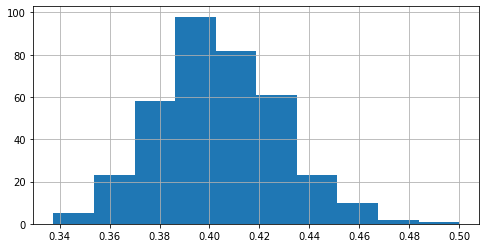

In [ ]:
plt.figure(figsize = (8,4))
news_df_selected['Subjectivity'].hist()
plt.show()

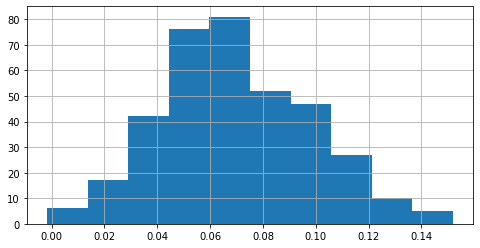

In [ ]:
plt.figure(figsize = (8,4))
news_df_selected['Polarity'].hist()
plt.show()

In [ ]:


senti_ana = SentimentIntensityAnalyzer()

news_df_selected['compound'] = [senti_ana.polarity_scores(i)['compound'] for i in news_df_selected['headline_text']]
news_df_selected['Negative'] = [senti_ana.polarity_scores(i)['neg'] for i in news_df_selected['headline_text']]
news_df_selected['Neutral'] = [senti_ana.polarity_scores(i)['neu'] for i in news_df_selected['headline_text']]
news_df_selected['Positive'] = [senti_ana.polarity_scores(i)['pos'] for i in news_df_selected['headline_text']]

news_df_selected.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
3194,2009-11-12,Marketing mantras for Indian IT cos Maoist's' ...,0.412336,0.054556,-0.999400,0.123000,0.798000,0.079000
3195,2009-11-13,Dad; get me Kat: Shahid Tum Mile: Movie Review...,0.378859,0.041210,-0.999700,0.148000,0.748000,0.104000
3196,2009-11-14,Enough of Aamir; Saif tells Bebo Dad was a goo...,0.450113,0.102865,-0.999200,0.142000,0.746000,0.112000
3197,2009-11-15,Cancer patients fall ill on train 3-day combin...,0.418572,0.097062,-0.999500,0.178000,0.687000,0.134000
3198,2009-11-16,Having a ball: On and off the field I can't co...,0.381763,0.140484,-0.999700,0.164000,0.719000,0.117000


In [ ]:
news_df_selected

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
3194,2009-11-12,Marketing mantras for Indian IT cos Maoist's' ...,0.412336,0.054556,-0.999400,0.123000,0.798000,0.079000
3195,2009-11-13,Dad; get me Kat: Shahid Tum Mile: Movie Review...,0.378859,0.041210,-0.999700,0.148000,0.748000,0.104000
3196,2009-11-14,Enough of Aamir; Saif tells Bebo Dad was a goo...,0.450113,0.102865,-0.999200,0.142000,0.746000,0.112000
3197,2009-11-15,Cancer patients fall ill on train 3-day combin...,0.418572,0.097062,-0.999500,0.178000,0.687000,0.134000
3198,2009-11-16,Having a ball: On and off the field I can't co...,0.381763,0.140484,-0.999700,0.164000,0.719000,0.117000
3199,2009-11-17,Big B; Aamir to talk business! I love Kareena ...,0.380509,0.062337,-0.999800,0.152000,0.748000,0.099000
3200,2009-11-18,Today's kids make school; career decisions ear...,0.366977,0.067887,-0.999800,0.148000,0.763000,0.090000
3201,2009-11-19,Shamita upset with Bigg Boss It's blackmail; P...,0.402113,0.042117,-0.999900,0.159000,0.746000,0.095000
3202,2009-11-20,Richa is back! Kurbaan: Movie Review Madhuri D...,0.386585,0.072496,-0.999700,0.143000,0.770000,0.086000
3203,2009-11-21,Revealed: Six faux pas of online dating East w...,0.393144,0.054802,-0.999600,0.163000,0.723000,0.114000


In [ ]:
news_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 3194 to 3556
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           363 non-null    datetime64[ns]
 1   headline_text  363 non-null    object        
 2   Subjectivity   363 non-null    float64       
 3   Polarity       363 non-null    float64       
 4   compound       363 non-null    float64       
 5   Negative       363 non-null    float64       
 6   Neutral        363 non-null    float64       
 7   Positive       363 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 25.5+ KB


In [ ]:
df_sp_bse_stock_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       300 non-null    object 
 1   Open       294 non-null    float64
 2   High       294 non-null    float64
 3   Low        294 non-null    float64
 4   Close      300 non-null    float64
 5   Adj Close  294 non-null    float64
 6   Volume     294 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.5+ KB


In [ ]:
df_sp_bse_stock_copy1["Date"]=pd.to_datetime(df_sp_bse_stock_copy1.Date)

In [ ]:
merged_df=pd.merge(news_df_selected, df_sp_bse_stock_copy1, on='Date')

In [ ]:
merged_df.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive,Open,High,Low,Close,Adj Close,Volume
0,2009-11-12,Marketing mantras for Indian IT cos Maoist's' ...,0.412336,0.054556,-0.999400,0.123000,0.798000,0.079000,16822.179688,16896.619141,16605.009766,16696.029297,16696.029297,27200.000000
1,2009-11-13,Dad; get me Kat: Shahid Tum Mile: Movie Review...,0.378859,0.041210,-0.999700,0.148000,0.748000,0.104000,16693.150391,16909.740234,16666.699219,16848.830078,16848.830078,21400.000000
2,2009-11-16,Having a ball: On and off the field I can't co...,0.381763,0.140484,-0.999700,0.164000,0.719000,0.117000,16893.109375,17083.199219,16893.109375,17032.509766,17032.509766,19000.000000
3,2009-11-17,Big B; Aamir to talk business! I love Kareena ...,0.380509,0.062337,-0.999800,0.152000,0.748000,0.099000,17036.230469,17080.169922,16882.980469,17050.650391,17050.650391,20400.000000
4,2009-11-18,Today's kids make school; career decisions ear...,0.366977,0.067887,-0.999800,0.148000,0.763000,0.090000,17032.009766,17098.789063,16958.410156,16998.779297,16998.779297,18200.000000


In [ ]:
merged_df_selected = merged_df[['Close','Subjectivity', 'Polarity', 'compound', 'Negative', 'Neutral' ,'Positive']]
merged_df_selected.head()

,Close,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,16696.029297,0.412336,0.054556,-0.999400,0.123000,0.798000,0.079000
1,16848.830078,0.378859,0.041210,-0.999700,0.148000,0.748000,0.104000
2,17032.509766,0.381763,0.140484,-0.999700,0.164000,0.719000,0.117000
3,17050.650391,0.380509,0.062337,-0.999800,0.152000,0.748000,0.099000
4,16998.779297,0.366977,0.067887,-0.999800,0.148000,0.763000,0.090000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_selected_df = pd.DataFrame(sc.fit_transform(merged_df_selected))
new_selected_df.columns = merged_df_selected.columns
new_selected_df.index = merged_df_selected.index
new_selected_df.head()

,Close,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,0.176036,0.423692,0.376578,0.000301,0.312500,0.746667,0.215054
1,0.205755,0.203659,0.287227,0.000150,0.507812,0.413333,0.483871
2,0.241480,0.222742,0.951839,0.000150,0.632812,0.220000,0.623656
3,0.245008,0.214500,0.428667,0.000100,0.539062,0.413333,0.430108
4,0.234919,0.125557,0.465820,0.000100,0.507812,0.513333,0.333333


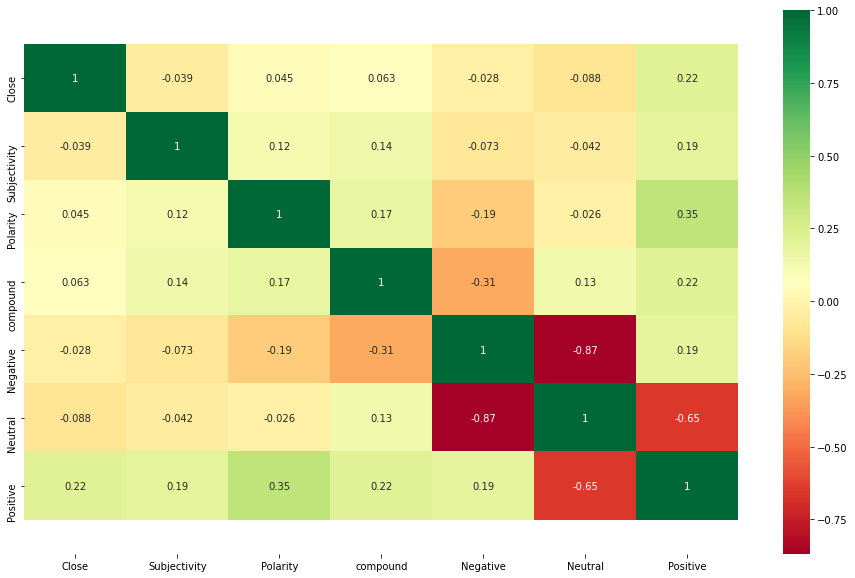

In [ ]:
#Check the affect of the sentiments of the news headlines on the Stock price
plt.figure(figsize = (16, 10))
ax=sns.heatmap(new_selected_df.corr(), annot = True, cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

## Therefore from the above heatmap we can see that none of the sentiments viz. positivity,negativity and neutrality have any affect on the stock price.

In [ ]:
X = new_selected_df.drop('Close', axis=1)
y =new_selected_df['Close']

In [ ]:
X.head()

,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,0.423692,0.376578,0.000301,0.312500,0.746667,0.215054
1,0.203659,0.287227,0.000150,0.507812,0.413333,0.483871
2,0.222742,0.951839,0.000150,0.632812,0.220000,0.623656
3,0.214500,0.428667,0.000100,0.539062,0.413333,0.430108
4,0.125557,0.465820,0.000100,0.507812,0.513333,0.333333


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
X_train.shape

(199, 6)

In [ ]:
X_train[:10]

,Subjectivity,Polarity,compound,Negative,Neutral,Positive
108,0.282199,0.529044,0.001806,0.429688,0.346667,0.698925
18,0.577900,0.496722,0.000251,0.273438,0.920000,0.000000
205,0.473053,0.657966,0.000050,0.734375,0.300000,0.344086
15,0.239340,0.392178,0.000100,0.585938,0.406667,0.387097
71,0.380572,1.000000,0.994984,0.398438,0.240000,0.913978
7,0.259840,0.317709,0.000201,0.429688,0.580000,0.322581
228,0.582741,0.416626,0.000401,0.429688,0.453333,0.526882
180,0.401334,0.288285,0.000150,0.375000,0.780000,0.064516
146,0.306198,0.670030,0.000351,0.476562,0.506667,0.365591
160,0.254830,0.313428,0.000050,0.640625,0.533333,0.107527


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction=rf.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, prediction)).round(2)
mape = np.round(np.mean(np.abs(y_test-prediction)/y_test)*100,2)

tempResults = pd.DataFrame({'Method':['RandomForestRegressor'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,926.410000,4.120000
0,RandomForestRegressor,0.210000,68.790000


In [ ]:
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)
predictions1 = adb.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions1)).round(2)
mape = np.round(np.mean(np.abs(y_test-predictions1)/y_test)*100,2)

tempResults1 = pd.DataFrame({'Method':['AdaBoostRegressor'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults1])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,926.410000,4.120000
0,RandomForestRegressor,0.210000,68.790000
0,AdaBoostRegressor,0.240000,89.910000


In [ ]:

from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
predictions2 = dec_tree.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions2)).round(2)
mape = np.round(np.mean(np.abs(y_test-predictions2)/y_test)*100,2)

tempResults2 = pd.DataFrame({'Method':['DecisionTreeRegressor'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults2])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,926.410000,4.120000
0,RandomForestRegressor,0.210000,68.790000
0,AdaBoostRegressor,0.240000,89.910000
0,DecisionTreeRegressor,0.340000,101.700000


In [ ]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:

predictions3 = lgb.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions3)).round(2)
mape = np.round(np.mean(np.abs(y_test-predictions3)/y_test)*100,2)

tempResults3 = pd.DataFrame({'Method':['LGBMRegressor'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults3])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,926.410000,4.120000
0,RandomForestRegressor,0.210000,68.790000
0,AdaBoostRegressor,0.240000,89.910000
0,DecisionTreeRegressor,0.340000,101.700000
0,LGBMRegressor,0.220000,67.390000


In [ ]:
lgb_prediction_df=pd.DataFrame(predictions3,columns=["Close"])

In [ ]:
lgb_prediction_df.head()

,Close
0,0.336093
1,0.407305
2,0.267799
3,0.468247
4,0.398224


In [ ]:

xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

[22:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:

predictions4 = xgb.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions4)).round(2)
mape = np.round(np.mean(np.abs(y_test-predictions4)/y_test)*100,2)

tempResults4 = pd.DataFrame({'Method':['XGBRegressor'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults4])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,926.410000,4.120000
0,RandomForestRegressor,0.210000,68.790000
0,AdaBoostRegressor,0.240000,89.910000
0,DecisionTreeRegressor,0.340000,101.700000
0,LGBMRegressor,0.220000,67.390000
0,XGBRegressor,0.210000,70.790000


In [ ]:
# Therefore on comparison of all the models we can see that Simple exponential smoothing model has the highest accuracy i.e 95.88%.

# **Conclusion:**
- Stock price prediction using Numerical analysis is Rs. 20564.
- By Sentiment Analysis we have come to the conclusion that none of the sentiments viz. Positivity,negativity and neutrality have any affect on the stock price.
- Also we have seen the results of the numerical analysis are more accurate i.e Rs. 20564.
- Suggestion: Since the stock prices are lower than the just previous date, but not too low it will not be a good idea to buy the shares at this point in time instead it will be a good idea to sell shares if they had been bought when the price were too low in the past to gain a high profit margin.